In [22]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
filename = '/home/mark/installs/gpmp2/mark_gpmp2/current_dev/hsr_results.csv'

In [24]:
df = pd.read_csv(filename,
                 header=None,
                names=['config', 'speed', 'static_cols', 
                       'update_cols', 'full_cols', 
                       'static_cost', 'update_cost', 'full_cost'])

# Check whether trajectory is collision-free
df['static_col_free_bool'] = (df['static_cols']==0).astype(int)
df['update_col_free_bool'] = (df['update_cols']==0).astype(int)
df['full_col_free_bool'] = (df['full_cols']==0).astype(int)


no_solution_inds = (df['static_col_free_bool'] == True) | (df['update_col_free_bool'] == True) | (df['full_col_free_bool'] == True)
df = df[no_solution_inds]

In [25]:
df['full_cols']

0      0
1      0
2      0
3      0
4      0
      ..
520    0
521    0
522    0
523    0
526    0
Name: full_cols, Length: 520, dtype: int64

In [26]:
speed_group = df.groupby(['speed']);

speed_static_cost = speed_group.mean()['static_cost']
speed_update_cost = speed_group.mean()['update_cost']
speed_full_cost = speed_group.mean()['full_cost']

speed_static_cols = speed_group.mean()['static_cols']
speed_update_cols = speed_group.mean()['update_cols']
speed_full_cols = speed_group.mean()['full_cols']

speed_static_cost_std = speed_group.std()['static_cost']
speed_update_cost_std = speed_group.std()['update_cost']
speed_full_cost_std = speed_group.std()['full_cost']

speed_static_cols_std = speed_group.std()['static_cols']
speed_update_cols_std = speed_group.std()['update_cols']
speed_full_cols_std = speed_group.std()['full_cols']

static_col_free_ratio = (speed_group.sum()/speed_group.count())['static_col_free_bool']
update_col_free_ratio = (speed_group.sum()/speed_group.count())['update_col_free_bool']
full_col_free_ratio = (speed_group.sum()/speed_group.count())['full_col_free_bool']

In [27]:
# df[df['speed']==0.4]

# Plots

<IPython.core.display.Javascript object>


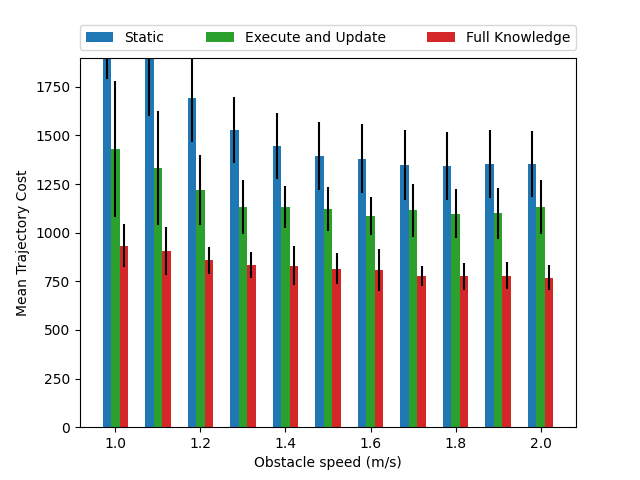

In [31]:
# speeds = (np.array(range(len(speed_static_cost)))+1)/10
speeds = np.array(df['speed'].unique())

plt.figure(1);
plt.bar(speeds -0.02, 
        speed_static_cost, yerr=speed_static_cost_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        speed_update_cost, yerr=speed_update_cost_std, width=0.02, color='tab:green', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        speed_full_cost, yerr=speed_full_cost_std, width=0.02, color='tab:red', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)")
plt.ylabel("Mean Trajectory Cost")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.ylim([0,1900])
plt.savefig('HSRExperiment_SpeedVsMeanTrajCost.png', dpi=199)
plt.show()

<IPython.core.display.Javascript object>


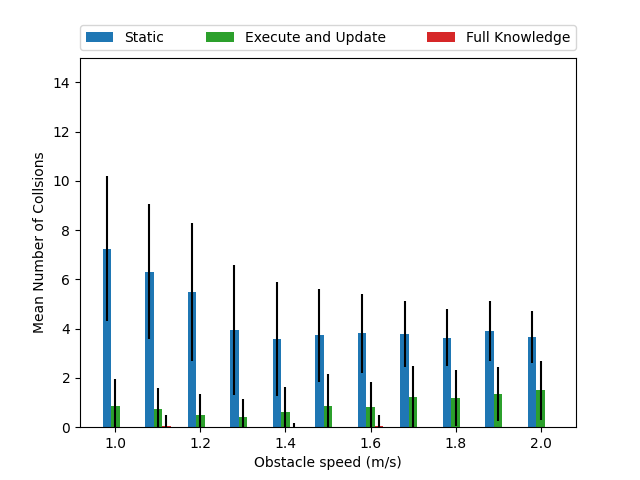

In [32]:
plt.figure(2);
plt.bar(speeds -0.02, speed_static_cols, yerr=speed_static_cols_std, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, speed_update_cols, yerr=speed_update_cols_std, width=0.02, color='tab:green', align='center', label='Execute and Update')
plt.bar(speeds + 0.02, speed_full_cols, yerr=speed_full_cols_std, width=0.02, color='tab:red', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)")
plt.ylabel("Mean Number of Collsions")
plt.ylim([0,15])
plt.savefig('HSRExperiment_SpeedVsMeanCollsions.png', dpi=199)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()

<IPython.core.display.Javascript object>


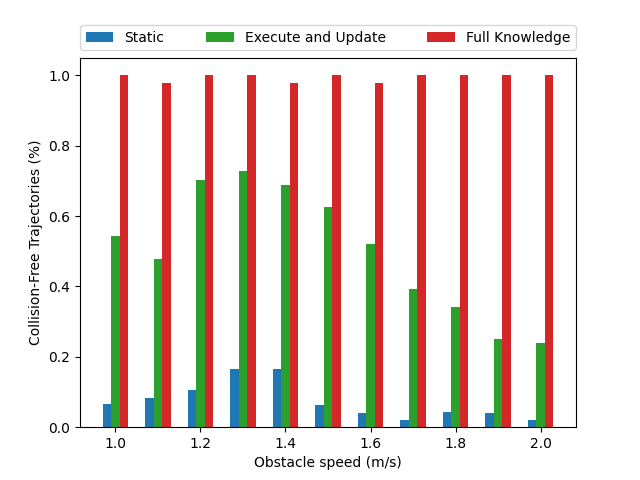

In [33]:
plt.figure(3);
plt.bar(speeds -0.02, 
        static_col_free_ratio, width=0.02, color='tab:blue', align='center', label='Static')
plt.bar(speeds, 
        update_col_free_ratio, width=0.02, color='tab:green', align='center', label='Execute and Update')
plt.bar(speeds +0.02,
        full_col_free_ratio, width=0.02, color='tab:red', align='center', label='Full Knowledge')
plt.xlabel("Obstacle speed (m/s)")
plt.ylabel("Collision-Free Trajectories (%)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('HSRExperiment_SpeedVsColFree.png', dpi=199)
plt.show()